In [95]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [14]:
rest_count_file="../data/rawdata/restaurant_count_2.csv"
prop_value_file="../data/rawdata/Property_data.csv"
rest_count_df = pd.read_csv(rest_count_file, encoding="ISO-8859-1")
prop_value_df = pd.read_csv(prop_value_file, encoding="ISO-8859-1")
zip_prop_value_avg=prop_value_df.groupby(['zip'])['estimate'].mean()
zip_prop_value_avg_df=pd.DataFrame(zip_prop_value_avg).reset_index()
zip_prop_value_avg_df.head()

,zip,estimate
0,77003,304618.520
1,77004,332700.348
2,77005,1185270.596
3,77006,642616.528
4,77007,528380.128


In [13]:
rest_count_df.head()

,lat,lng,# Restaurants,zipcode
0,29.756845,-95.365652,60,77002.0
1,29.724893,-95.363752,10,77004.0
2,29.749778,-95.345885,41,77003.0
3,29.740970,-95.391301,60,77006.0
4,29.718435,-95.423555,60,77005.0


In [75]:
merged_data=rest_count_df.merge(zip_prop_value_avg_df,how="right",left_on='zipcode',right_on='zip')
merged_data=merged_data.sort_values('estimate',ascending=False).reset_index(drop=True)
merged_data=merged_data.reset_index()
merged_data

,index,lat,lng,# Restaurants,zipcode,zip,estimate
0,0,29.754150,-95.409498,25.0,77019.0,77019,1337546.668
1,1,29.772179,-95.514203,0.0,77024.0,77024,1311313.400
2,2,29.718435,-95.423555,60.0,77005.0,77005,1185270.596
3,3,29.748202,-95.468948,58.0,77056.0,77056,1144477.220
4,4,29.740079,-95.446409,45.0,77027.0,77027,1077188.354
5,5,29.734813,-95.416098,60.0,77098.0,77098,903371.870
6,6,29.706787,-95.401748,34.0,77030.0,77030,845639.132
7,7,29.704019,-95.460905,15.0,77401.0,77401,813535.256
8,8,29.740970,-95.391301,60.0,77006.0,77006,642616.528
9,9,29.796871,-95.491650,30.0,77055.0,77055,619098.068


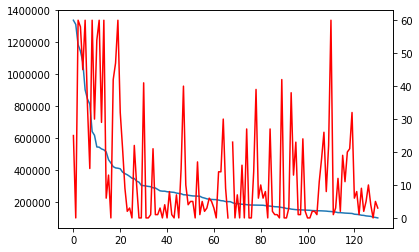

In [79]:
fig, ax1 = plt.subplots()
ax1.plot(merged_data['index'],merged_data['estimate'])
ax2=ax1.twinx()
ax2.plot(merged_data['index'],merged_data['# Restaurants'],color='red')


In [96]:
correlation=merged_data['estimate'].corr(merged_data['# Restaurants'])
print(correlation)
covariance = np.cov(merged_data['estimate'], merged_data['# Restaurants'])
print(covariance)
correlation2 = pearsonr(merged_data['estimate'], merged_data['# Restaurants'])
print(correlation2)
correlation3 = spearmanr(merged_data['estimate'], merged_data['# Restaurants'])
print(correlation3)

0.47128360013025045
[[5.57378412e+10            nan]
 [           nan            nan]]
(nan, 1.0)
SpearmanrResult(correlation=nan, pvalue=nan)
